# Calificación automática de imágenes de combinaciones lineales usando *Deep Learning*. 


Gerardo Muñoz-Quiñones(Universidad Distrital FJC, Grupo LAMIC)
gmunoz.udistrital.edu.co@gmail.com

## Resumen

En este artículo se ilustran algunas de los procedimientos a seguir para procesar imágenes con Redes Neuronales Artificiales (RNA) usando la librería Keras.

La entrada a la RNA es una imagen de dos sucesiones de vectores (flechas) y la salida corresponde a una imagen de vistos buenos y vistos malos. La RNA debe descubrir en que casos colocar un visto bueno o un visto malo.

En este artículo, se evalúa gráficamente la combinación lineal de los vectores $\vec{v_1}$, $\vec{v_2}$, $\vec{v_3}$:

![](https://raw.githubusercontent.com/GerardoMunoz/LinearCombinationGrade/master/fondo/fondo_256x192_117,70.png)


 El estudiante debe graficar dos combinaciones lineales:
 * $\vec{u_1}=2\vec{v_1}-2\vec{v_2}+\vec{v_3}$
 * $\vec{u_2}=3\vec{v_1}+2\vec{v_2}-3\vec{v_3}$

Por lo tanto, debe obtener algo parecido a:

![](https://raw.githubusercontent.com/GerardoMunoz/LinearCombinationGrade/master/ejemplos/sub111.jpg)

Para el entrenamiento de la RNA se generaron por computador imágenes calificadas como la siguiente:

![](https://raw.githubusercontent.com/GerardoMunoz/LinearCombinationGrade/master/ejemplos/img1582162288_14_33.png)



La entrada de la RNA son las imágenes de color verde y azul. La salida de la RNA debe ser la imagen de color rojo, con los vistos buenos y los vistos malos. <!--Gracias a los avances en *Deep learning* que han permitido que se pueda realizar este tipo de calificación automática. --> 

En el artículo se presentan tres modelos de RNA con sus respectivos resultados. En particular los resultados del último modelo son interesantes.

Pero antes de presentar los modelos, se realiza el proceso para acceder a los datos. También se explica cómo guardar los modelos y como recuperarlos.

Se usará el lenguaje de programación **Python** (ver http://docs.python.org.ar/tutorial/3/introduction.html). Recordemos que en este lenguaje, después del símbolo `#` se pueden colocar comentarios. Es de resaltar que, en Python es muy importante la **sangría**, la cual tiene el papel de los corchetes en otros lenguajes como C o R.

También se usará **Jupyter**, que es un programa que corre en el navegador y contiene celdas de texto y celdas de código (Python). En este caso usaremos los cuadernos de Jupyter ubicados en 
https://colab.research.google.com/

Este artículo está dirigido a personas con bases en *machine learning* y quieren comenzar a explorar *deep learning*.
 






# Copiar y descomprimir los archivos

In [2]:
!ls

sample_data


In [0]:
import requests, zipfile, io
zip_file_url="https://raw.githubusercontent.com/GerardoMunoz/LinearCombinationGrade/master/proy_18_19b.zip"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [4]:
!ls 

ejemplos  fondo  generadas  sample_data



Los archivos copiados tienen la siguiente estructura de carpetas:
```
proy_18_19b/
├──fondo/
├──ejemplos/
└──generadas/
   ├──test/
   ├──train/
   └──valid/
```  

La carpeta `generadas` está dividida en tres subcarpetas, cada una tiene un conjunto de imágenes diferente:
* La carpeta de **entrenamiento**, `train`, contiene las imágenes de con las que se entrena la red neuronal. 
* La carpeta de **validación**, `valid`, contiene las imágenes que ayudan a determinar cuando es necesario detener el proceso de entrenamiento. 
* La carpeta de **evaluación**, `test`, contiene las imágenes que determinan que tan bien se realizó el entrenamiento. 

Usualmente el conjunto total de imágenes se reparten aproximadamente en 70%, 15% y 15% respectivamente. 
En nuestro caso no usaremos las imágenes de la carpeta de evaluación. La evaluación será la misma validación.



## Lectura y visualización de imágenes
El siguiente paso consiste en leer una imagen y mostrarla.

In [0]:
import numpy as np #numpy es una librería para arreglos, como las imágenes.

from matplotlib import pyplot as plt #matplotlib es una librería que permite
                                     #           leer imagenes y
                                     #           presentarlas en Jupyter.

In [6]:
imagen_color=plt.imread("generadas/train/img1582162288_14_33.png")
             #plt.imread("gdrive/My Drive/...) Lee la imagen que está en Google Drive             

print(imagen_color.shape) # imagen_color es un arreglo que tiene la imagen
                      # imagen_color.shape devuelve las dimensiones del arreglo
                      # print(...) En este caso muestra '(192, 256, 3)'
                      #            que son las dimensiones del arreglo

(192, 256, 3)


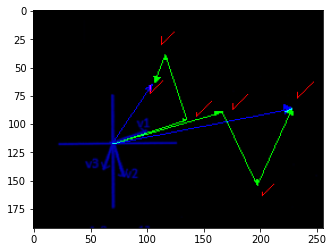

In [7]:
plt.imshow(imagen_color) # Muestra a continuación la imagen

La anterior imagen es en colores.
* La variable ```imagen_color``` tiene un **arreglo** de numpy.   
* La instrucción ```imagen_color.shape``` devuelve una **tupla** con las dimensiones del arreglo:
  * 192 renglones
  * 256 columnas
  * 3 colores

A continuación se muestra, en escala de grises, sólo el canal de las flechas que corresponde al color verde.

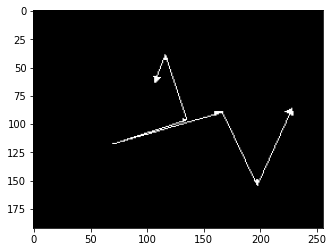

In [8]:
plt.imshow(imagen_color[:,:,1], cmap='gray')

En la anterior instrucción ```imagen_color[:,:,1]``` 
* El primer ```:``` corresponde a todos los renglones de la imagen, 
* El segundo ```:``` corresponde a todas las columnas de la imagen,
* El ```1``` corresponde al verde, si hubiera un ```0``` sería rojo y el ```2``` para el azul.

A continuación se añaden los ejes de coordenadas a la imagen.


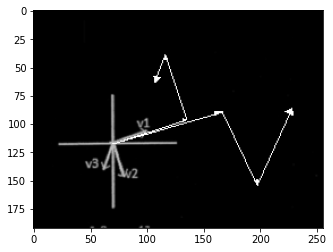

In [9]:
fondo=plt.imread("fondo/fondo_256x192_117,70.png")
img_con_fondo=np.maximum(imagen_color[:,:,1],fondo)
plt.imshow(img_con_fondo, cmap='gray')

La siguiente rutina permite automatizar el proceso de presentar varias imágenes.

In [0]:
def plots(imagenes):   # Esta rutina imprime varias imágenes en grises 
  n=len(imagenes) #len devuelve el número de elementos de una lista 

  plt.clf() # Borra las gráficas anteriores
  plt.figure(figsize=(20, 4)) # Define el tamaño de la figura 
  for i in range(n): # Este ciclo for repite n veces lo que esté con sangría
                     # en la primera iteración i vale cero
                     # cada iteración se suma 1 a i
                     # el ciclo termina antes de que i valga n

    ax = plt.subplot(1, n, i+1) #subplot selecciona la subimagen i+1 de n

    plt.imshow(imagenes[i].reshape(192, 256)) 
                          #imshow adiciona la imagen al respectivo subplot

    plt.gray() # La imagen es en escala de grises
      
  return plt.show() #show presenta la imagen con las subimágenes.



## Preprocesamiento de los datos

La siguiente rutina, lee todas las imágenes de un directorio y las coloca en un formato adecuado para ser procesadas por la librería Keras. Inicialmente las imágenes son almacenadas en una **lista** y luego son convertidas a un **arreglo de numpy**.

In [0]:
import glob   #glob permite leer los nombres de los archivos en una carpeta.                                                                             
 
def leeImagenes(carpet):       #def permite definir funciones
                               #leeImagenes es el nombre de la función
                               # la función tiene dos parámetros: 
                               # carpet y canal.
                               #
                               # Las siguientes instrucciones que pertenecen
                               # a la función tienen sangría.

  x_imgs=[]   #imgs_x es el nombre de la variable que almacenará las imágenes
              #   de entrada a la RNA
              #[] se usa para definir una lista vacía

  y_imgs=[]  #imgs_x almacenará las imágenes de salida de la RNA

  listArch = glob.glob(carpet) #listArch tiene una lista con los
                             # nombres de los archivos que hay en carpet 
                               
  print('listArch',len(listArch),carpet) # imprime la cantidad de archivos 
                             # y el nombre de la carpeta 
 

  for arch in listArch: # Repite para cada nombre de listArch
                  #arch toma un nombre de archivo en cada iteración
                  # la sangría define las instrucciones que se iteran 
                  # el ciclo termina cuando se acaban los nombres de archivos

    imag = plt.imread(arch) #imag almacena la imagen a colores

    #x_imgs.append(np.maximum(imag[... ,1],imag[... ,2]))
    x_imgs.append(imag[... ,1])
                   #append agrega la imagen a la lista 
                   #  en este caso mezcla el verde y el azul
                   #  los cuales serán la entrada a la RNA
    
    y_imgs.append(imag[... ,0]) #  la imagen de color rojo será 
                                #  la salida de la RNA

    

  # Aquí termina la sangría del 'for'.

  x_imgs=np.array(x_imgs)  # convierte la lista en un arreglo de numpy
  y_imgs=np.array(y_imgs)

  x_imgs= np.reshape(x_imgs,(*x_imgs.shape, 1)) 
  y_imgs= np.reshape(y_imgs,(*y_imgs.shape, 1))
          # Las imágenes en colores tienen
          # (alto,ancho,3 colores).
          # Las imágenes en escala de grises
          # tienen (alto, ancho).
          # El formato requerido por Keras, de la 
          # imagen en escala de grises es
          # (alto, ancho, 1 color)


  return x_imgs, y_imgs #return retorna de la función leeImagenes(carpet):
                        #  con una tupla de los dos arreglos:
                        #  el de entrada a la RNA y el de salida.

In [12]:
x_train1, y_train1 = leeImagenes("generadas/train/*.png") 
                              # lee las imágenes de entrenamiento

x_valid1, y_valid1 = leeImagenes("generadas/valid/*.png")
                              # lee las imágenes de validación

listArch 808 generadas/train/*.png
listArch 154 generadas/valid/*.png


In [13]:
x_train1.shape # 808 imágenes de
             # 192 renglones
             # 256 columnas
             # 1 color

(808, 192, 256, 1)

<Figure size 432x288 with 0 Axes>

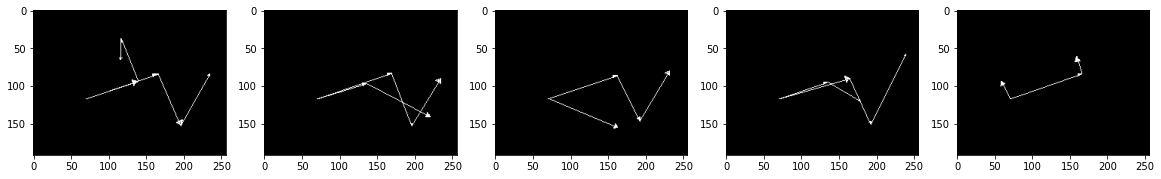

In [14]:
original=x_train1[0:5] #original tiene las primeras 5 imágenes
plots(original) 

<Figure size 432x288 with 0 Axes>

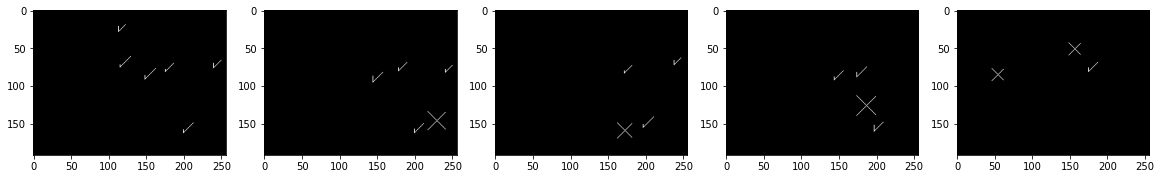

In [15]:
esperado=y_train1[0:5]
plots(esperado)

## Entrena y presenta

La siguiente rutina permite entrenar la RNA y presentar unas imágenes con una sola instrucción. <!--Aunque no es usual visualizar las imágenes de cada entrenamiento.-->

In [0]:
def entrenaYpresenta(modelo,x_train1, y_train1,x_valid1, y_valid1,verbose=1,epochs=1):
  historia=modelo.fit(x_train1, y_train1,
                epochs=epochs,
                batch_size=128,
                verbose=verbose,
                validation_data=(x_valid1, y_valid1),
               )
  transformada =modelo.predict(original)
  plots(original)
  plots(esperado)
  plots(transformada)
  return historia

#entrenaYpresenta(modelo1,x_train1, y_train1,x_valid1, y_valid1)

In [0]:
def plot_historia(historia,offset=0):
  plt.plot(historia.history['loss'][offset:]) # menor valor de loss mejora el entrenamiento
  plt.plot(historia.history['val_loss'][offset:]) # loss de las imágenes de validación
  plt.title('model loss') # Titulo de la grafica
  plt.ylabel('loss') # Titulo del eje y
  plt.xlabel('epoch') # Titulo d=l eje x
  plt.legend(['train', 'val'], loc='upper right')
  return plt.show() 

#plot_historia(historia1)

## Tercer Modelo, Combinando redes convolucional y densa 

Este modelo combina las capas de los dos modelos anteriores. La forma en que se combinan las capas depende del problema a resolver. Frecuentemente es necesario ensayar diferentes modelos antes de encontrar el que resuelve el problema.

In [18]:
from keras.layers import Input 
from keras.models import Model
from keras.layers import Flatten 
from keras.layers import Dense   
from keras.layers import Reshape 
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D 
from keras.layers import UpSampling2D 

input_img = Input(shape=(192, 256, 1))  

x = Conv2D(8, (5, 5), activation='relu', padding='same')(input_img)
x = MaxPooling2D((4, 4), padding='same')(x) 
x = Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D((4, 4), padding='same')(x) 

x = Flatten()(x)
x = Dense(12*16*8)(x)
x = Reshape((12,16,8 ))(x)

x = Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = UpSampling2D((4, 4))(x) 
x = Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = UpSampling2D((4, 4))(x) 
decoded3 = Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x)

modelo3 = Model(input_img, decoded3)
modelo3.compile(optimizer='adadelta', loss='binary_crossentropy')
modelo3.summary()

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 192, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 192, 256, 8)       208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 64, 8)         1608      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1536)              2360

<Figure size 432x288 with 0 Axes>

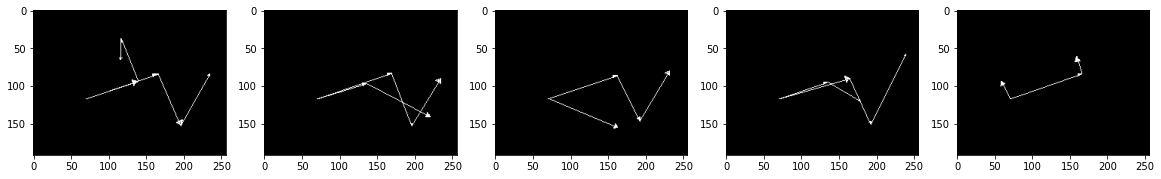

<Figure size 432x288 with 0 Axes>

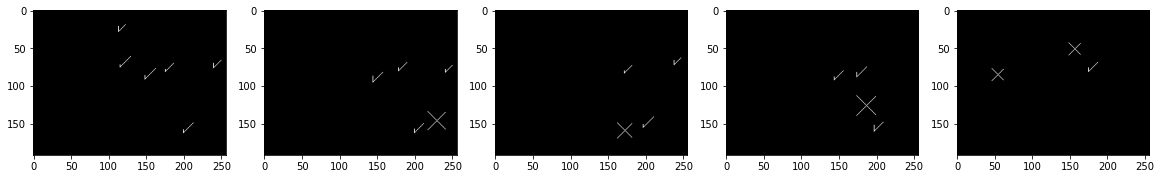

<Figure size 432x288 with 0 Axes>

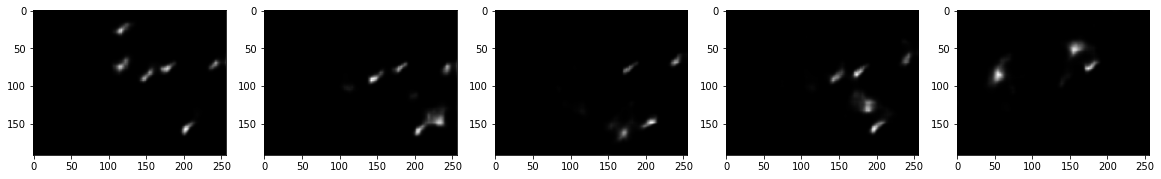

In [19]:
historia3=entrenaYpresenta(modelo3,x_train1, y_train1,x_valid1, y_valid1,verbose=0,epochs=600)

Los resultados de las imágenes de salida de este modelo son mucho mejores que la de los modelos anteriores, ya que permite diferenciar un visto bueno de un visto malo.

<!--Al observar las imágenes de entrenamiento se ve que alcanza a diferenciar los vistos buenos de los vistos malos. -->
Algo similar sucede en las imágenes de validación que se muestran a continuación.

<Figure size 432x288 with 0 Axes>

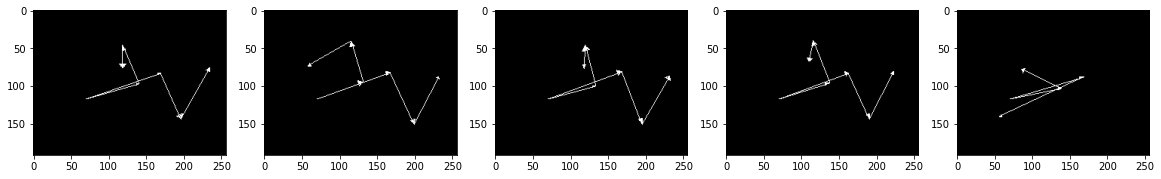

<Figure size 432x288 with 0 Axes>

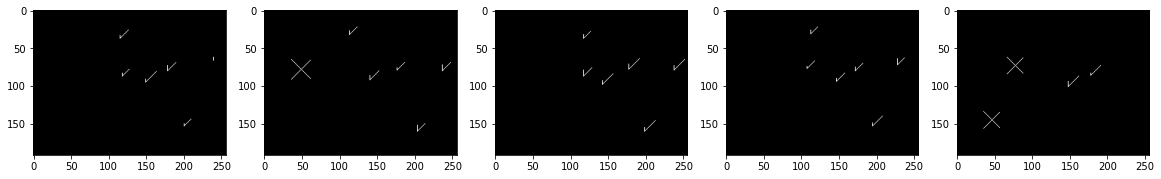

<Figure size 432x288 with 0 Axes>

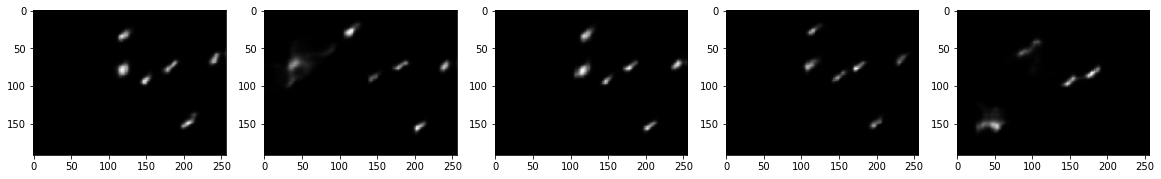

In [20]:
plots(x_valid1[5:10])
plots(y_valid1[5:10])
plots(modelo3.predict(x_valid1[5:10]))

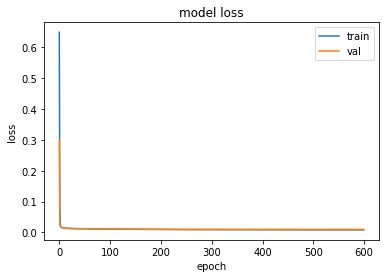

In [21]:
plot_historia(historia3)

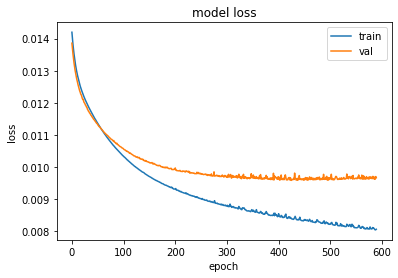

In [24]:
plot_historia(historia3,10)

En la anterior gráfica se ve que alrededor de la época 300 se obtiene el menor valor de validación.  Indicando que hay sobre-entrenamiento.




## Referencias
* docs.python.org.ar/tutorial/3/index.html
* python.org
* numpy.org
* matplotlib.org
* keras.io
* stackoverflow.com

